## Categorical Data

In [1]:
import numpy as np
import pandas as pd

values = pd.Series(['apple', 'orange', 'apple', 'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [2]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

## Computations with Categoricals

In [3]:
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [4]:
bins = pd.qcut(draws, 4)
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

In [5]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

['Q2', 'Q3', 'Q2', 'Q2', 'Q4', ..., 'Q3', 'Q2', 'Q1', 'Q3', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [6]:
bins.codes[:10]

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [7]:
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws)
           .groupby(bins)
           .agg(['count', 'min', 'max'])
           .reset_index())
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [8]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

## Better performance with categoricals

In [10]:
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))
categories = labels.astype('category')

In [11]:
labels.memory_usage()

80000132

In [12]:
categories.memory_usage()

10000336

## Categorical Methods

In [16]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [17]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

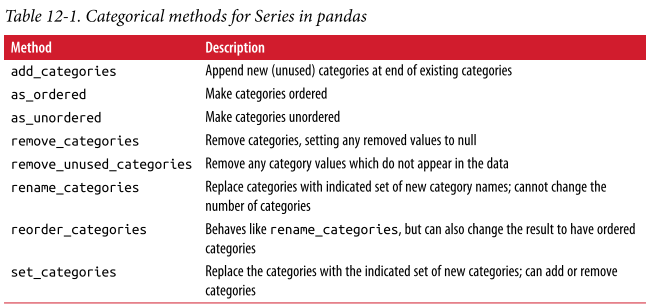